<a href="https://colab.research.google.com/github/cras-lab/BlockChain_API/blob/main/Bitcoin_OpenAPI_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open API를 이용해 700000 ~ 700020 블록 내용을 읽어옴

먼저 필요한 모듈을 임포트 한다.

In [3]:
import requests
import matplotlib.pyplot as plt

읽어 올 블록 범위를 지정한다. 무료버전에서는 많이 읽어올 수 없으므로<BR>
21개만 지정한다.

In [4]:
# Define the range of block heights
start_block = 700000
end_block = 700020

Open API 제공자의 URL을 설정한다.

In [5]:
# API URL
api_url = "https://api.blockchair.com/bitcoin/blocks"

트랜잭션 개수, 수수료, 보상금을 담아 둘 저장소를 마련한다.

In [36]:
# Collect data
block_heights = []
tx_counts = []
fees = []
rewards = []

루프를 돌면서 API를 불러 데이터를 읽어 온다.

In [37]:
# Loop through the range of block heights and collect data
for block_height in range(start_block, end_block + 1):
    response = requests.get(f"{api_url}?q=id({block_height})")
    data = response.json()

    if 'data' in data and data['data']:
        # Access the block data
        block_data = data['data'][0]  # First item in the list

        block_heights.append(block_data['id'])
        tx_counts.append(block_data.get('transaction_count', 0))

        # total에 보조금과 수수료가 모두 들어 있다.
        total_reward = block_data.get('reward', 0) / 1e8  # 사토시를  BTC로 수정
        block_reward = 6.25  # 현재 블록 보조금은 6.25로 고정되어 있음
        fee_value = total_reward - block_reward  # 전체 보상금에서 보조금을 빼면 수수료가 됨

        rewards.append(block_reward)
        fees.append(fee_value)
    else:
        # Default values if no data
        block_heights.append(block_height)
        tx_counts.append(0)
        fees.append(0)
        rewards.append(0)

그래프로 그린다. <BR>
트랜잭션은 천단위이고 수수료는 1단위이므로, 서로 단위가 다르므로 축을 분리<BR>
죄측은 트랜잭션, 우측은 보조금과 수수료 단위를 표시한다.

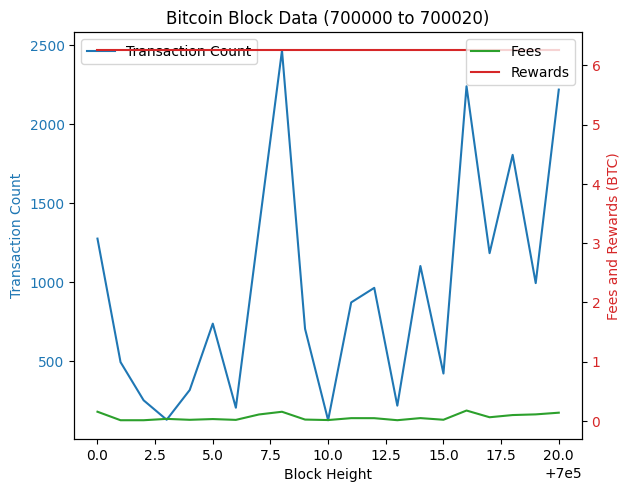

In [38]:
fig, ax1 = plt.subplots()

# Plot transaction counts
color = 'tab:blue'
ax1.set_xlabel('Block Height')
ax1.set_ylabel('Transaction Count', color=color)
ax1.plot(block_heights, tx_counts, color=color, label='Transaction Count')
ax1.tick_params(axis='y', labelcolor=color)

# Plot fees and rewards on a secondary y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Fees and Rewards (BTC)', color=color)
ax2.plot(block_heights, fees, color='tab:green', label='Fees')
ax2.plot(block_heights, rewards, color='tab:red', label='Rewards')
ax2.tick_params(axis='y', labelcolor=color)

# Legends
fig.tight_layout()  # Adjust layout to accommodate labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Bitcoin Block Data (700000 to 700020)')
plt.show()